In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
from scipy import signal
import niskine 

import mplniw.utils as ut
import mplniw.plot as pl
import mplniw.sigp as sp

In [2]:
conf = niskine.io.load_config()
lon, lat, bottom_depth = niskine.io.mooring_location(mooring=1)
root_dir = '/Users/zcasparcohen/codes/NIW/data/'
figdir = '/Users/zcasparcohen/Documents/NISKINE/Figures/'
mooring=1

In [3]:
ds = xr.open_dataset(root_dir+'M%s_bpfiltered.nc'%mooring)
gridded=xr.open_dataset(root_dir+'M%s_linear_merge_slinearfill.nc'%mooring)[['u','v']]
wkb = niskine.clim.get_wkb_factors(gridded)


In [15]:
ds

<xarray.Dataset>
Dimensions:     (z: 125, time: 73057)
Coordinates:
  * time        (time) datetime64[ns] 2019-05-17T16:00:00 ... 2020-10-06
  * z           (z) int64 0 16 32 48 64 80 96 ... 1904 1920 1936 1952 1968 1984
Data variables:
    u           (z, time) float64 ...
    v           (z, time) float64 ...
    u_filtered  (z, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    v_filtered  (z, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    bp_eke      (z, time) float64 ...
    ke          (z, time) float64 ...
    eke         (z, time) float64 ...
    bpu_wkb     (z, time) float64 ...
    bpv_wkb     (z, time) float64 ...
    bpuz        (z, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    bpvz        (z, time) float64 nan nan nan nan nan ... nan nan nan nan nan
    ni_UVz      (z, time) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j
Attributes:
    orientation:      down
    magdec:           -10.915967
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    mooring:          M1
    sn:               13481
    project:          NISKINe
    Bin1Dist:         24.59
    NCells:           44
    CellSize:         16.0
    proc time:        2022-05-09T19:08:16

In [16]:
ds['bpuz'] = wkb*ds['u_filtered'].differentiate('z')
ds['bpvz'] = wkb*ds['v_filtered'].differentiate('z')

ds['uz'] = wkb*ds['u'].differentiate('z')
ds['vz'] = wkb*ds['v'].differentiate('z')

(<Figure size 800x300 with 2 Axes>, <Axes: xlabel='time', ylabel='depth [m]'>)

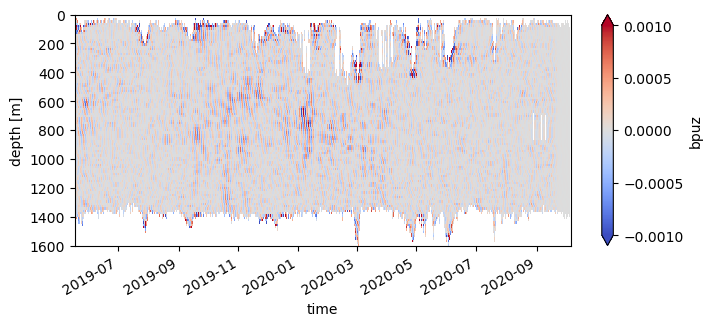

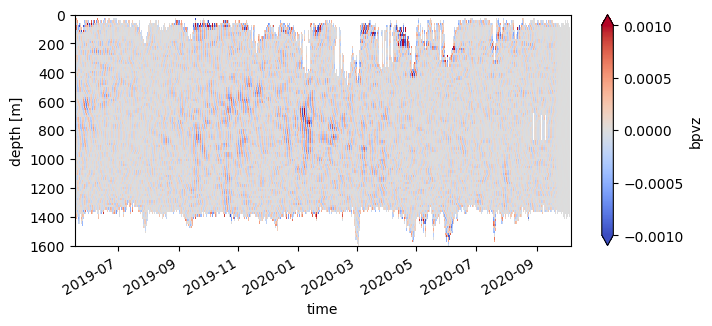

In [11]:
fig,ax = plt.subplots(figsize=(8,3))
pl.plot_uv(ds,'bpuz',fig,ax,**{'vmax':0.001,'ylim':(1600,0)})
fig,ax = plt.subplots(figsize=(8,3))
pl.plot_uv(ds,'bpvz',fig,ax,**{'vmax':0.001,'ylim':(1600,0)})

### Spectra

In [17]:
ds['ni_UVz'] = (ds['bpuz'] + 1j * ds['bpvz']).fillna(0.)
ds['UVz'] = (ds['uz'] + 1j * ds['vz']).fillna(0.)

In [18]:
Nb = 30*24*6
f,E = sp.wrap_spectra(ds,'UVz',Nb=Nb,**{'return_onesided':True})

/Users/zcasparcohen/miniconda3/envs/mpl_niw/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


/Users/zcasparcohen/miniconda3/envs/mpl_niw/lib/python3.11/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


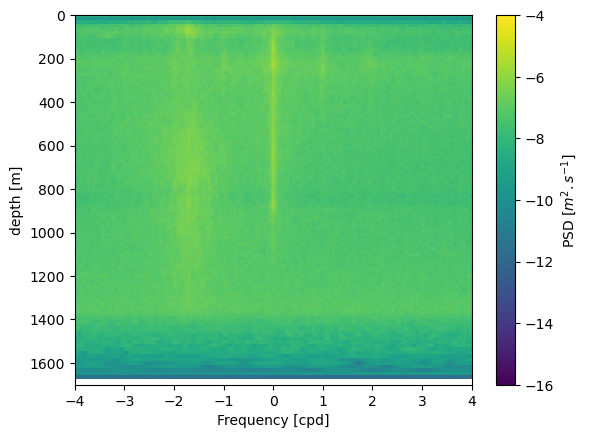

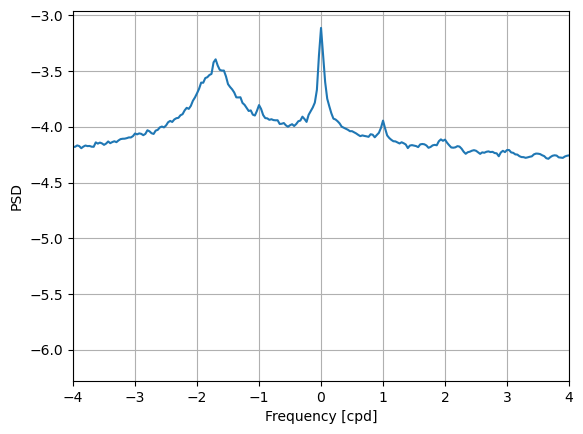

In [23]:
# Power spectra depending on depth
fig,ax = plt.subplots()
np.log10(E).plot(ax=ax,yincrease=False,xlim=(-4,4),ylim=(1700,0),vmax=-4,vmin=-16)

# Integrated rotary spectra
fig,ax = plt.subplots()
np.log10(E.integrate(coord='z')).plot(ax=ax,xlim=(-4,4));
ax.set_ylabel('PSD');
#for v in [-1.93,1.93,-fc]:
#    ax.axvline(v,c='k',lw=1,ls='--')
ax.grid();
#fig,ax = plt.subplots()
#np.log10(_E).plot(ax=ax,yincrease=False,xlim=(-4,4),vmax=0,vmin=-6)

#axins = ax.inset_axes([-0.5, 0.7, 0.4, 0.5])
#np.log10(E.integrate('z')).plot(ax=axins)
#axins.set_xlim((-2.5),(-1.1))
#axins.set_ylim((-1),(2))
#axins.axvline(-1.93,c='k',ls='--',lw=1);#axins.axvline(-fc,c='k',ls='--',lw=1);#axins.axvline(-fc-0.1,c='k',ls='--',lw=1);axins.axvline(-fc,c='k',ls='--',lw=1);
#ax.indicate_inset_zoom(axins,edgecolor='black')